### ARIMA

자기 회귀 누적 이동 평균

### 자기회귀 AR(auto regressive)

- AR(p) - 자기회귀(AutoRegressive)
   - 'p' = 과거 관측값의 수
   - 데이터의 이전 값에 대한 의존성

- I(d) - 차분(Integrated)
   - 'd'는 차분의 차수
   - 추세를 제거하여, 정상성을 띄게함

- MA(q) - 이동평균(Moving Average): 예측 오차의 이동평균
   - 'q' 과거 예측 오차의 수
   - 현재의 예측값이 이전의 예측 오차에 어느 정도 영향을 받는지

- 참고 : [03_rag_feature.ipynb](03_rag_feature.ipynb)


In [169]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

spy = yf.download('spy', start='2020-04-01', end='2021-04-01')
ar = spy[["Close"]].copy()
ar["lag_1"] = ar.shift(1)

ar.columns = [["Close","lag_1"]]

[*********************100%***********************]  1 of 1 completed


In [170]:
ar

,Close,lag_1
Date,,
2020-04-01 00:00:00+00:00,246.149994,NaN
2020-04-02 00:00:00+00:00,251.830002,246.149994
2020-04-03 00:00:00+00:00,248.190002,251.830002
2020-04-06 00:00:00+00:00,264.859985,248.190002
2020-04-07 00:00:00+00:00,265.130005,264.859985
...,...,...
2021-03-25 00:00:00+00:00,389.700012,387.519989
2021-03-26 00:00:00+00:00,395.980011,389.700012
2021-03-29 00:00:00+00:00,395.779999,395.980011


### 차분 (**integrated**)

- 시계열의 비정상성을 제거하기 위해 데이터를 변환하는 과정
- 데이터에서 추세를 제거하여 시계열이 정상성을 가지게 함
- 1 차 차분: 현재의 값에서 이전 값을 빼는 것

> cf) 잔차 : 예측과 실제 관측 간의 차이<br>모델의 성능을 평가하고, 모델 적합 후에 남은 오차를 분석하는 데 사용.


In [171]:
ar['diff'] = ar['Close'].values - ar['lag_1'].values # ar.diff(1)
ar.head(3)

,Close,lag_1,diff
Date,,,
2020-04-01 00:00:00+00:00,246.149994,NaN,NaN
2020-04-02 00:00:00+00:00,251.830002,246.149994,5.680008
2020-04-03 00:00:00+00:00,248.190002,251.830002,-3.639999



    
- 2차 차분: 현재의 값에서 1 차 차분을 빼는 것
- n차 차분: 현재의 값에서 n-1 차 차분을 빼는 것
- d 차 차분에 대한 ADF 검정을 통해  정상성이 확인되면 d 를 결정한다.



### 이동 평균(Moving Average) - q

- q : 과거의 예측 오차의 수, q 개의 과거 예측 오차 이용
- 현재의 예측 값이 이전의 예측 오차에 어느정도 영향을 받는지에 대한 모델
- 즉 예측 오차(residual errors : 잔 차)들에 대한 이동 평균
- MA(q) : q 개의 예측 오차 이용
    - 현재 시점의 값 $Y_t$ : $\mu + e_t + \theta_t e_{t-1}$
        
        $\mu$ : 시계열 평균 (월 평균, 연 평균 등)
        
        $e_t$ : 현재 시점의 오차
        
        $\theta_t$ : 지난 오차에 대한 가중치
        

[이동 평균선 및 다항 특성 : Time Series](01_time_series.ipynb)

- Partial Autocorrolation로 결정한다.
- 예시 : ARIMA (**Autoregressive integrated moving average**) 자기 회귀 누적 이동 평균

2020-04-10    2.903742
2020-04-11    2.830903
2020-04-12    2.804709
2020-04-13    2.795289
2020-04-14    2.791902
2020-04-15    2.790683
2020-04-16    2.790245
2020-04-17    2.790088
2020-04-18    2.790031
2020-04-19    2.790011
Freq: D, Name: predicted_mean, dtype: float64


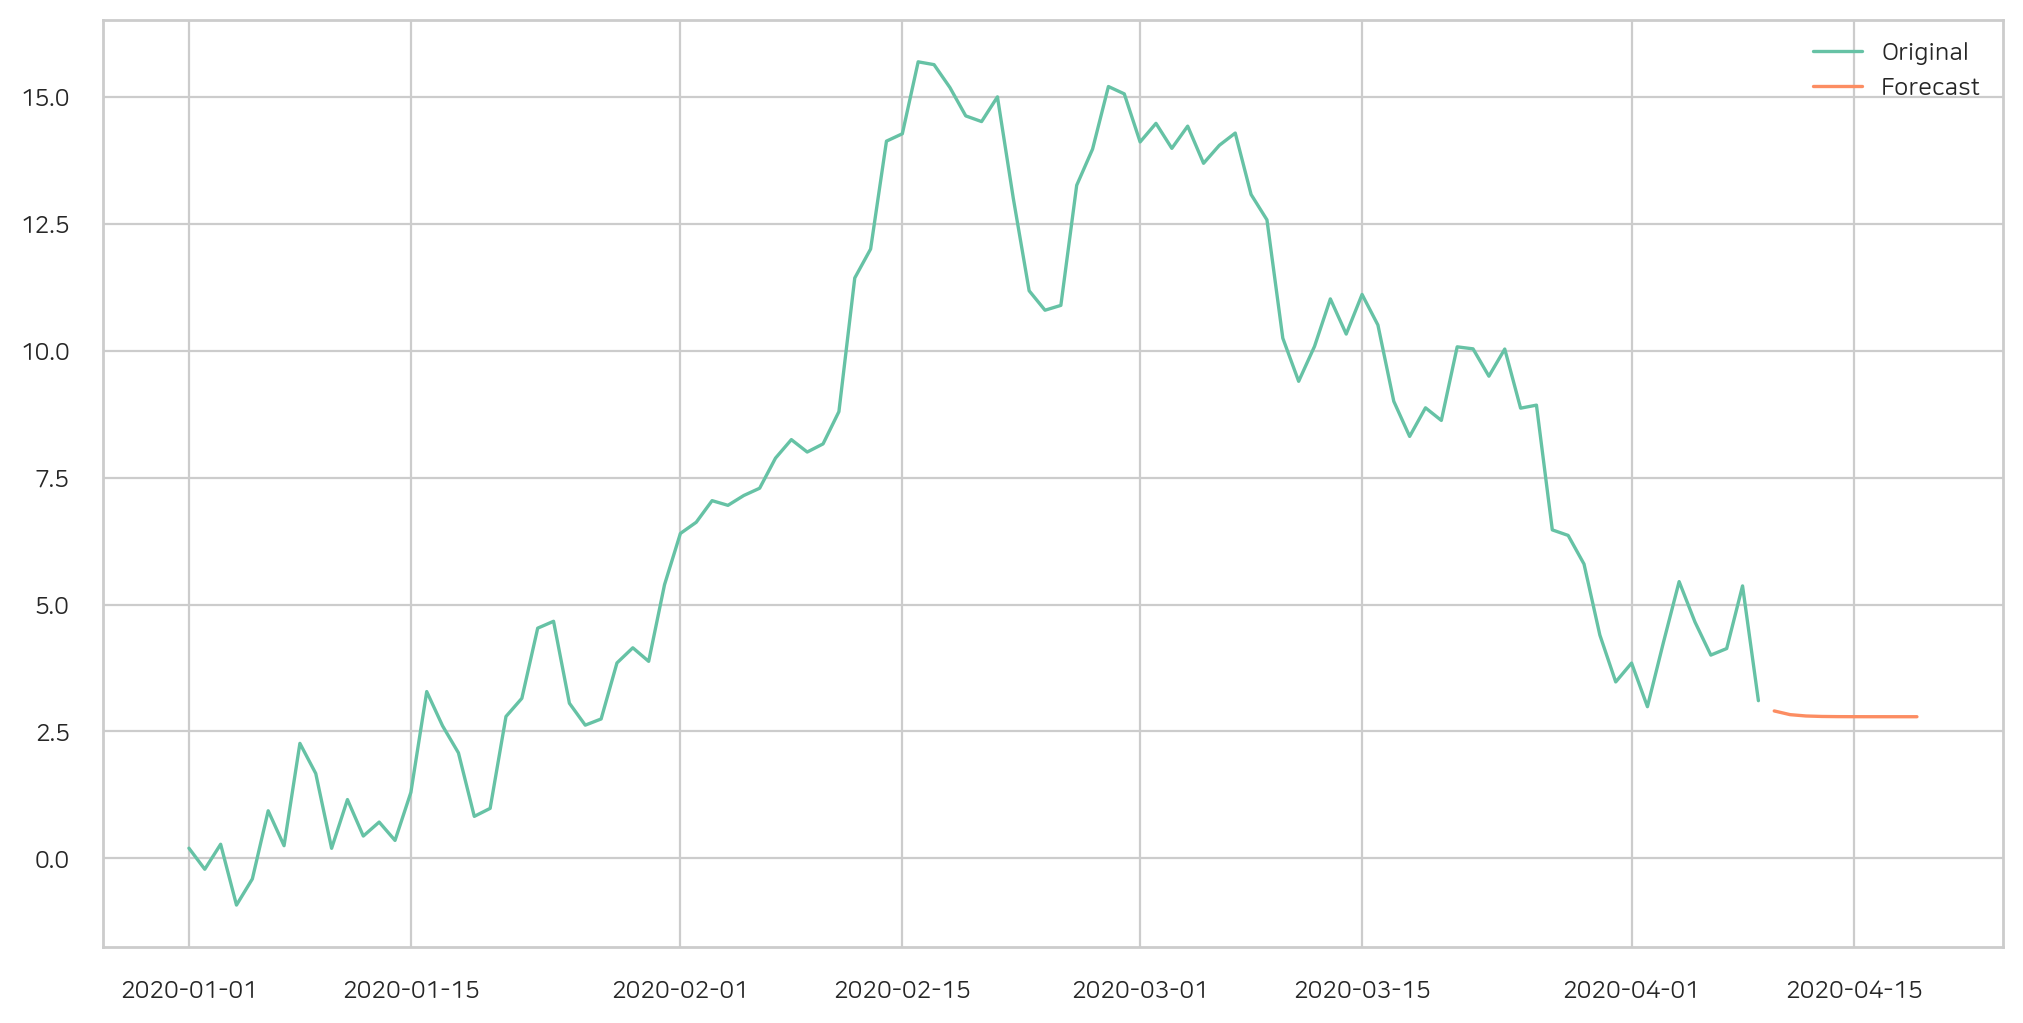

In [172]:
# Arima 분석
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = np.random.randn(100).cumsum()
# 누적 합 계산 [1, 2, 3, 4]에 cumsum을 적용하면 [1, 3, 6, 10]

time_series = pd.Series(data, index=pd.date_range(start='20200101', periods=100))

model = ARIMA(time_series, order=(1, 1, 1)) # 순서대로 AR, Integreted, MA(q)
# 자기 회귀 : 1, 차분 : 1, 이동 평균 : 1
model_fit = model.fit()

# 다음 10 기간에 대한 데이터를 예측
forecast = model_fit.forecast(steps=10)

print(forecast)

# 원본 데이터와 예측 결과를 함께 그래프로 표시
plt.figure(figsize=(10,5))
plt.plot(time_series, label='Original')
plt.plot(pd.date_range(start='20200410', periods=10, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()

### 자기 상관성 확인 (Autocorrelation)

In [173]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

spy = yf.download('spy', start='2020-04-01', end='2021-04-01')
ar = spy[["Close"]].copy()

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_20486/1749996859.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


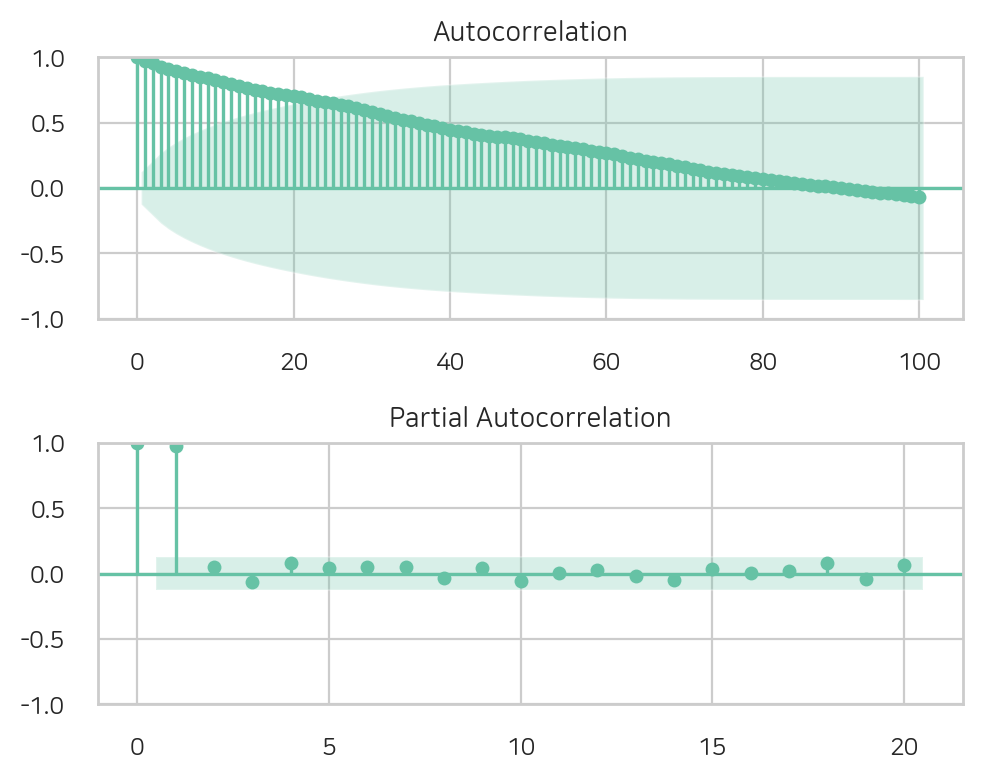

In [174]:
# ACF 및 PACF 플롯 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4))

plot_acf(ar['Close'], ax=ax1, lags=100)
plot_pacf(ar['Close'], ax=ax2, lags=20);
fig.tight_layout()

- Autocorrelation
    - 천천히 감소하여 데이터가 정상성이 보이지 않는다. → 차분의 필요성이 보임
    - 정상성의 시계열 데이터 : 상대적으로 빠르게 감소 0에 수렴한다.
    - 위의 그래프에서는 p 의 95 퍼센트 신뢰구간의 값은 22 언저리 정도 으로 보인다.
- Partial Autocorrelation
    - 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성 → q 값을 결정할 수 있다. 여기서 봤을 때 자기 회귀(q)는 1 로 보인다.
    - 신뢰 구간 밖의 1에 가까운 두 포인트

### Augmented Dickey-Fuller 를 이용한 정상성 검정
- 전체 데이터에 대한 검정

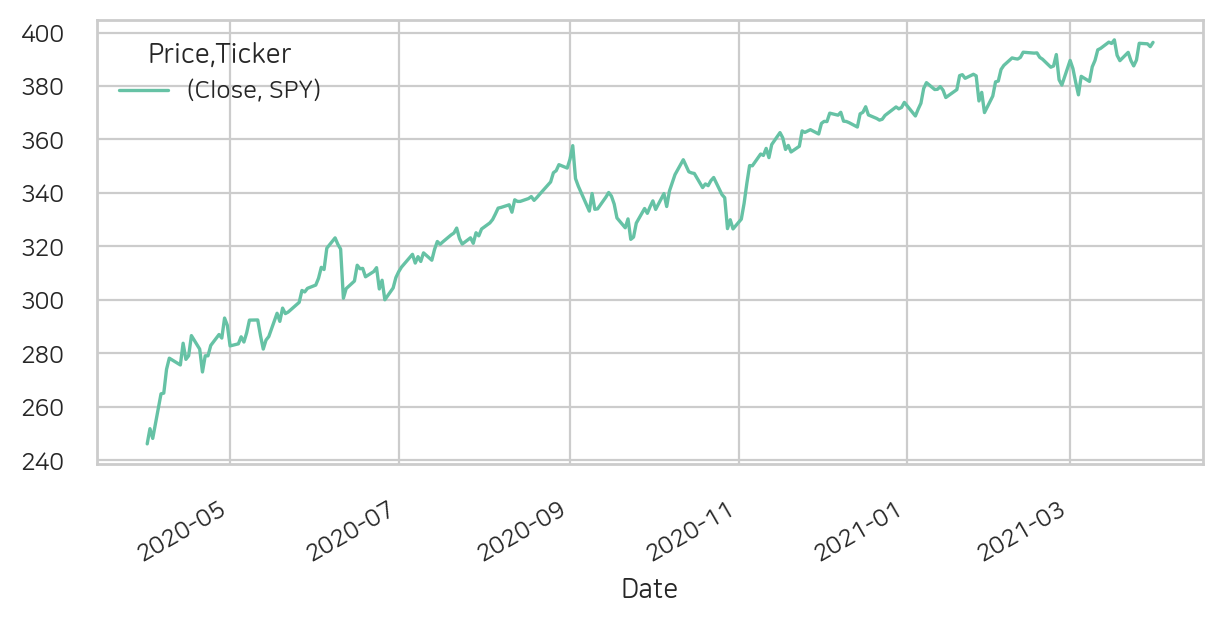

In [175]:
ar.plot(figsize=(6, 3));

In [176]:
from statsmodels.tsa.stattools import adfuller

print('ADF test with spy time-series')
ADF_result = adfuller(ar.values)

#ADF 통계량
print('ADF Stats: %f' % ADF_result[0])

#p-값
print('p-value: %f' % ADF_result[1])

#임계값
print('Critical values:' )
for key, value in ADF_result[4].items():
    print('\t%s: %.4f' % (key, value))

ADF test with spy time-series
ADF Stats: -1.385978
p-value: 0.588980
Critical values:
	1%: -3.4573
	5%: -2.8734
	10%: -2.5731


- [p-value 에 대한 해석법](03_통계.ipynb)
    
    - 유의 확률 (P-Value) : 유의수준(0.05 또는 다른 값) 에 따라 유의 수준 보다 작으면 새로운 가설로 설정, 그렇지 않다면 기존 가설 유지
    - 검정 통계량이 Critical Value 보다 작은 경우에 정상성을 띈다 라고 볼 수 있다.
    - 위의 결과에서 ADF Stats의 값이 모든 Critical Values 보다 크고 p-value 값이 상당히 크기 때문에 대립 가설(정상성을 띄는가)은 기각되었다.
    
    즉 위의 데이터 정상성은 띄지 않는다

### 차분에 대한 ADF
- 첫번째 차분에 대한 결과 : 결과에서 볼 때 잔차에 대한 정정상성이 성립하게 된다고 보았다. 즉 이부분에서 차분 차수 1 이 결정되었다.


In [177]:

from statsmodels.tsa.stattools import adfuller

def diff_result(diffs):
    print(diffs,'차분에 대한 ADF test with spy time-series')
    ADF_result = adfuller(ar.diff(diffs).dropna())
    #ADF 통계량
    print('ADF Stats: %f' % ADF_result[0])
    #p-값
    print('p-value: %f' % ADF_result[1])
    #임계값
    print('Critical values:' )
    for key, value in ADF_result[4].items():
     print('\t%s: %.4f' % (key, value))

diff_result(1)

1 차분에 대한 ADF test with spy time-series
ADF Stats: -6.004145
p-value: 0.000000
Critical values:
	1%: -3.4586
	5%: -2.8740
	10%: -2.5734


- ARIMA 분석을 를 이용한

In [178]:
model = ARIMA(ar['Close'], order=(22, 1, 1)) # 순서대로 AR, Integreted, MA(q)
# 자기 회귀 : 지연 피쳐가 22 이상에서 95% 신뢰구간에 들어왔다.
# 차분 : 1 로 두었을 때 정상성이 있음을 확인했다.
# Ma(q) : 부분 자기 상관에서 1 이후로 급감을 보였다.
model_fit = model.fit()

# 다음 100 기간에 대한 데이터를 예측
forecast = model_fit.forecast(steps=100)

/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an

252    395.452225
253    395.193421
254    394.567482
255    396.178373
256    397.580764
          ...    
347    398.321674
348    398.319100
349    398.316833
350    398.316328
351    398.313198
Name: predicted_mean, Length: 100, dtype: float64


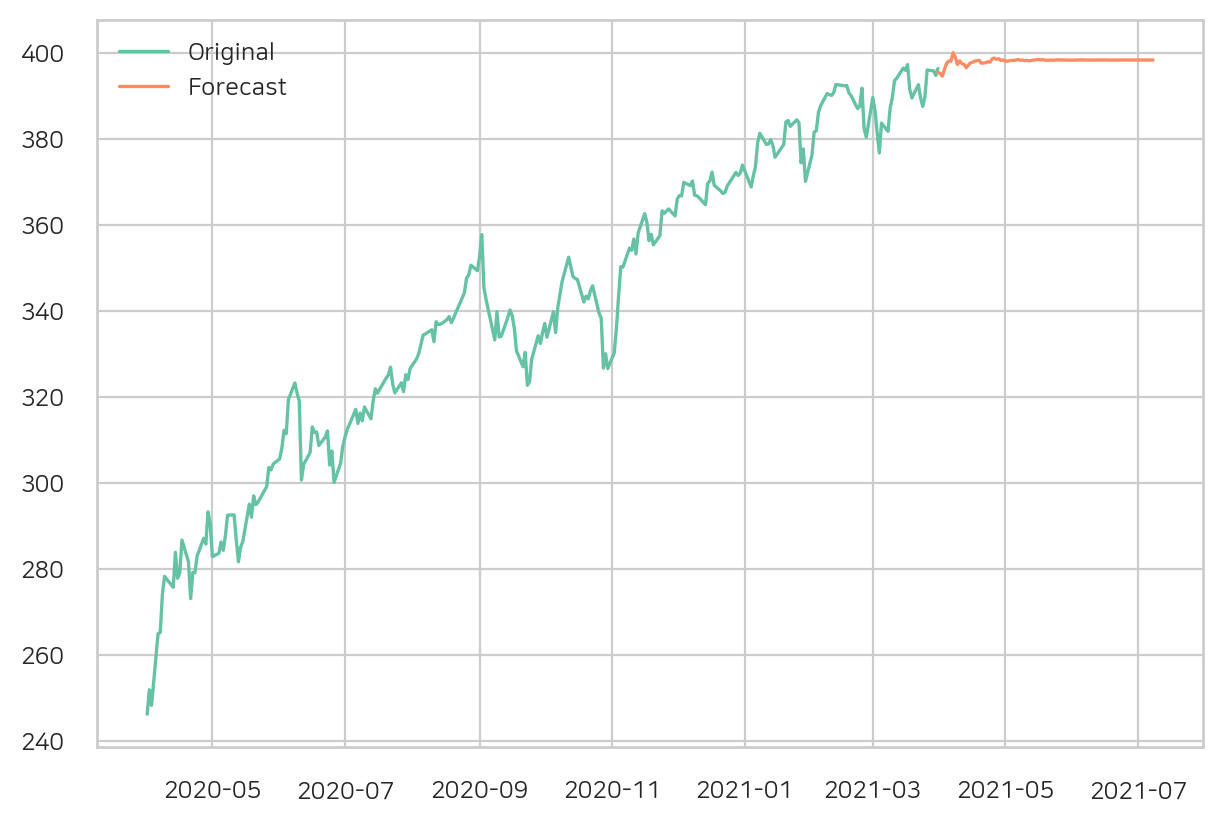

In [179]:
print(forecast)

# 원본 데이터와 예측 결과를 함께 그래프로 표시
plt.figure(figsize=(6,4))
plt.plot(ar, label='Original')
plt.plot(pd.date_range(start=ar.index.max(), periods=100, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()

### statsmodels
- 통계 모델링, 경제학, 금융학 등에서 사용되는 통계적 모델과 테스트 방법을 제공하는 라이브러리
- 선형 회귀, 시계열 분석, 로지스틱 회귀 분석 등 수행


In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [181]:
import statsmodels.api as sm

In [182]:
# AirPassengers 데이터셋을  불러옴
# 1949년부터 1960년까지 매월 항공기 탑승객 수

data = sm.datasets.get_rdataset("AirPassengers").data

In [183]:
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')

data.head()

,time,value
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


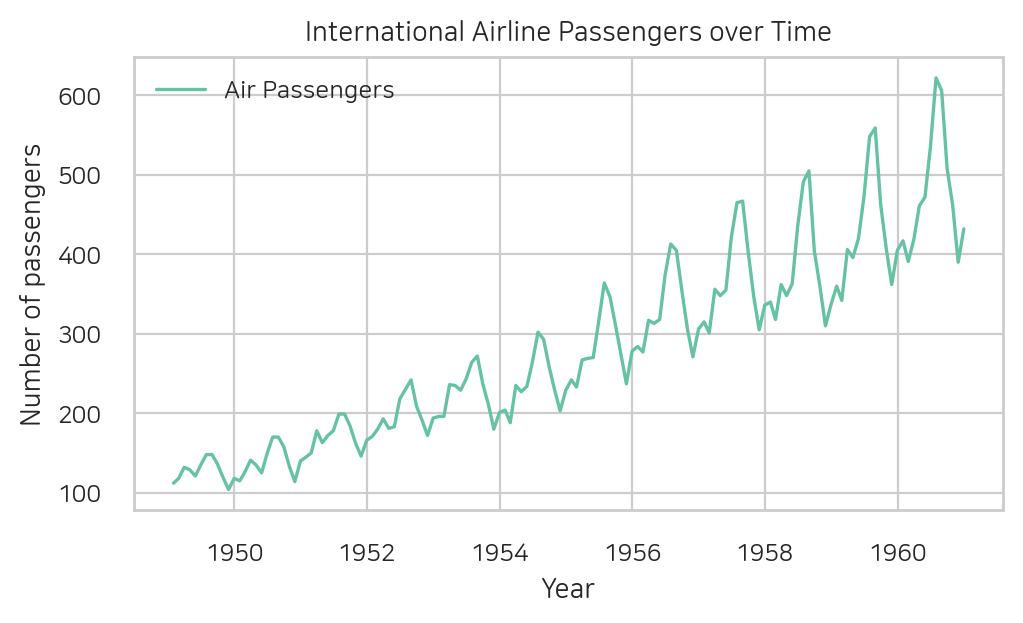

In [184]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(data['time'], data['value'], label='Air Passengers')
ax.set_xlabel('Year')
ax.set_ylabel('Number of passengers')
ax.set_title('International Airline Passengers over Time')
ax.legend();

- **residual** (잔차) : 원본 시계열 데이터에서 추세(trend)와 계절성(seasonality) 성분을 제거한 후 남는 부분

/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


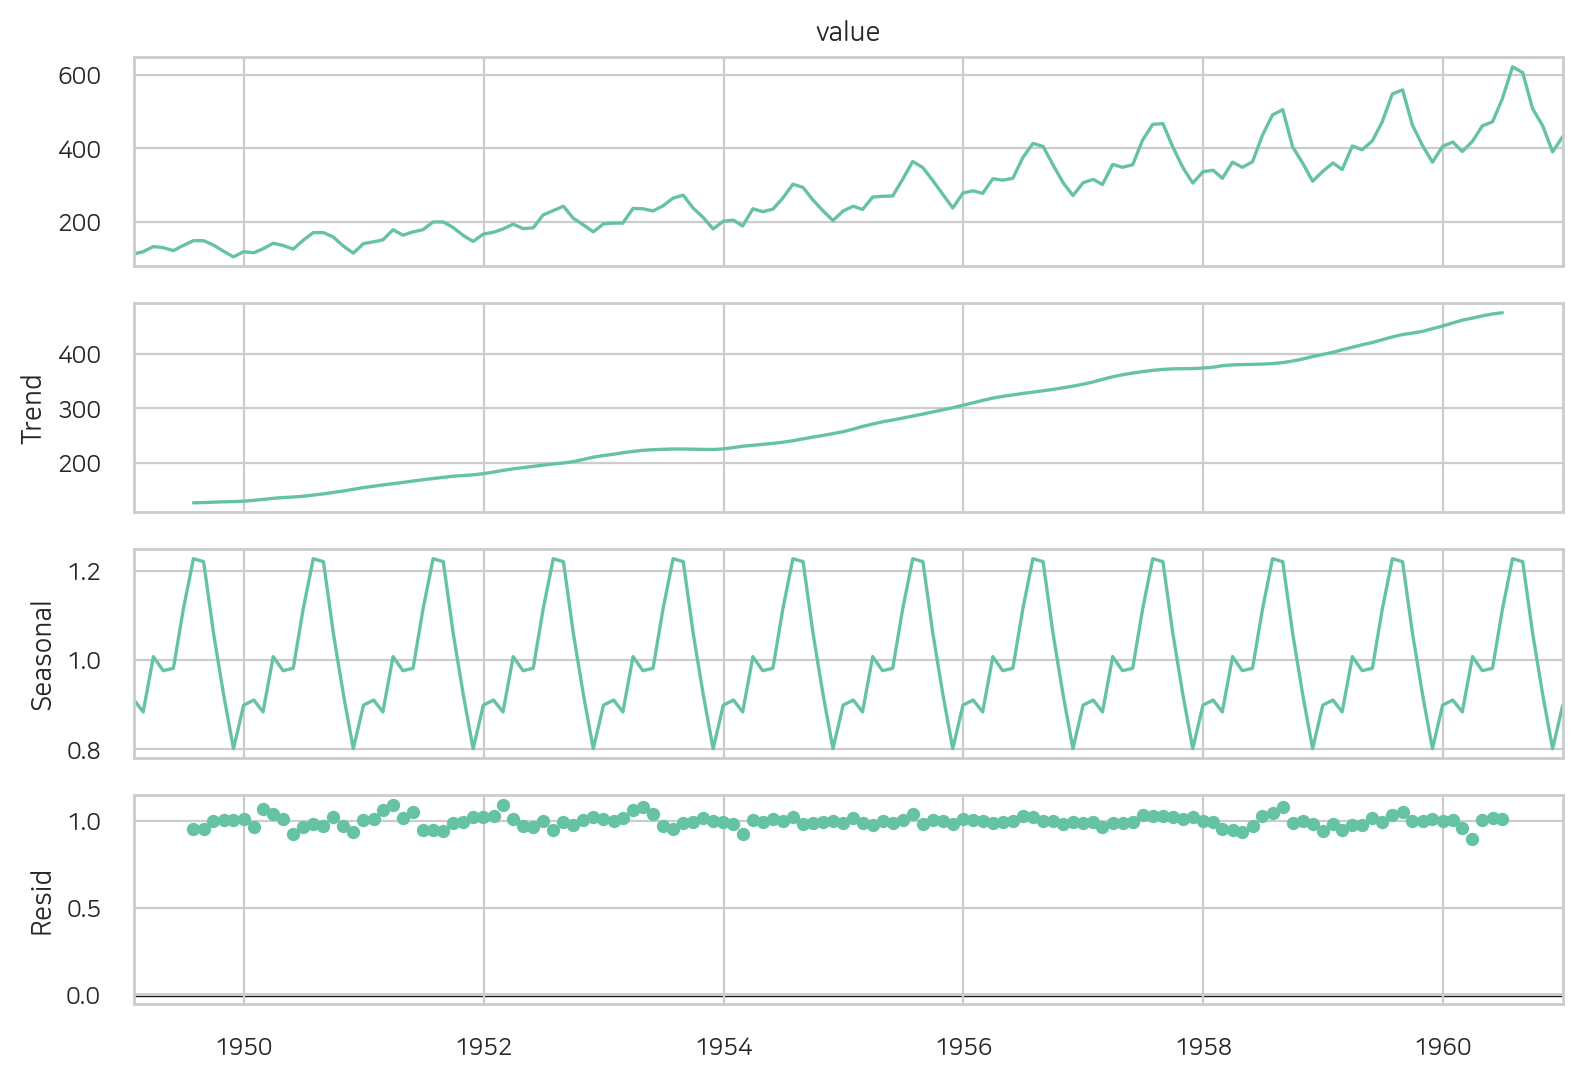

In [194]:
# 'time' 열을 인덱스로 설정하여 시계열 데이터 생성
ts = data.set_index('time')['value']

# 시계열 데이터의 추세, 순환, 계절성 분해
result = sm.tsa.seasonal_decompose(ts, model='multiplicative')

# 결과 시각화
fig = result.plot()

In [186]:
from statsmodels.tsa.arima.model import ARIMA

/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


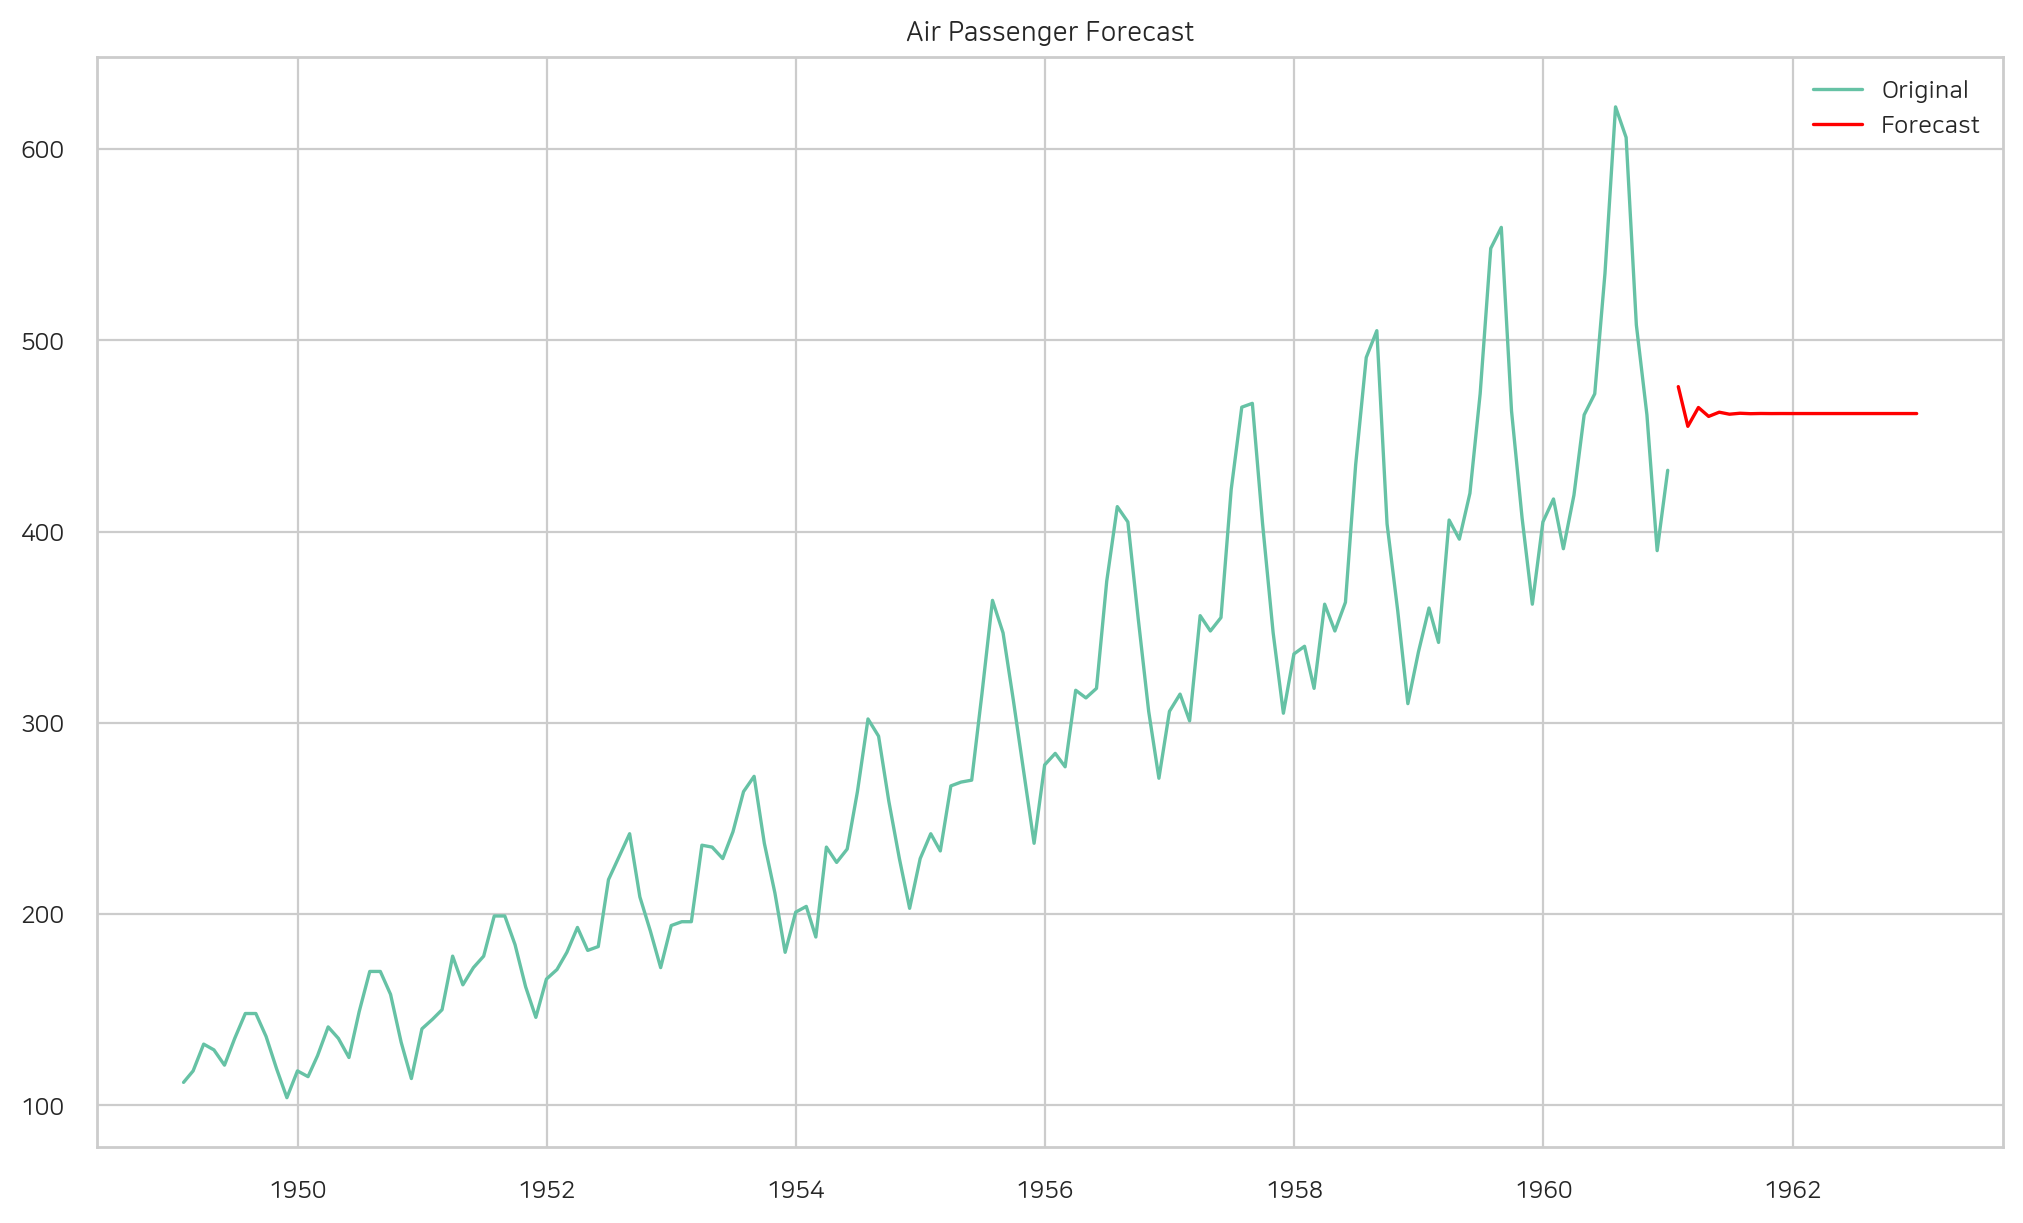

In [187]:
# 모델 파라미터 (p=1, d=1, q=1)
# p: 자기 회귀(AR)의 차수, d: 차분(I)의 차수, q: 이동 평균(MA)의 차수
model = ARIMA(ts, order=(1, 1, 1))

# 모델 학습
model_fit = model.fit()

# 미래 승객 수 예측: 다음 24개월(2년) 동안의 데이터를 예측
forecast = model_fit.forecast(steps=24)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10,6))
fig.tight_layout()
plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Air Passenger Forecast')
plt.show()